<a href="https://colab.research.google.com/github/bishair/Model/blob/main/GW1Model-Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow pandas scikit-learn matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import os
from google.colab import files
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Prompt the user to select a file from their local computer
uploaded = files.upload()

In [ ]:
# Get a list of all files in the current working directory (where uploaded files are located)
uploaded_files = os.listdir()

# Print the list of uploaded files
print("Uploaded files:")
for file in uploaded_files:
    print(file)

Uploaded files:
.config
G1F.csv
sample_data


In [ ]:
#os.remove("")

In [ ]:
data = pd.read_csv('G1F.csv', delimiter=';')

In [ ]:
data.head()

,date,G1,RiverLevel,Recharge,Precipitation
0,02/06/2014,"110,738","110,659","5,00E-09",0
1,03/06/2014,"110,658","110,49","5,00E-09",0
2,04/06/2014,"110,563","110,391","5,00E-09",0
3,05/06/2014,"110,498","110,292","5,00E-09",0
4,06/06/2014,"110,428","110,234","5,00E-09",0


In [ ]:
# RplacE commas with dots in excel
for col in ['G1', 'RiverLevel', 'Recharge', 'Precipitation']:
    data[col] = pd.to_numeric(data[col].str.replace(',', '.'), errors='coerce')

# Remove NaN
data = data.dropna()

# Normalize the data
scaler = MinMaxScaler()
#Use fit_transform => calculate max and min for each feature and tranform/scale according to these values
data[['G1', 'RiverLevel', 'Recharge', 'Precipitation']] = scaler.fit_transform(data[['G1', 'RiverLevel', 'Recharge', 'Precipitation']])
print(data[['G1', 'RiverLevel', 'Recharge', 'Precipitation']])

# Split the data into features(x) and target (Y)
X = data[['RiverLevel', 'Recharge', 'Precipitation']]
y = data['G1']
print('X',X)
print('y',y)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

           G1  RiverLevel  Recharge  Precipitation
0    0.996575    0.864353       0.0       0.000000
1    0.941781    0.775499       0.0       0.000000
2    0.876712    0.723449       0.0       0.000000
3    0.832192    0.671399       0.0       0.000000
4    0.784247    0.640904       0.0       0.000000
..        ...         ...       ...            ...
104  0.743151    0.872766       0.0       0.010638
105  1.000000    1.000000       0.0       0.000000
106  0.976027    0.926393       0.0       0.000000
107  0.986301    0.904837       0.0       0.000000
108  0.921233    0.778128       0.0       0.000000

[109 rows x 4 columns]
X      RiverLevel  Recharge  Precipitation
0      0.864353       0.0       0.000000
1      0.775499       0.0       0.000000
2      0.723449       0.0       0.000000
3      0.671399       0.0       0.000000
4      0.640904       0.0       0.000000
..          ...       ...            ...
104    0.872766       0.0       0.010638
105    1.000000       0.0       0.

In [ ]:
# Model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),    #First hidden layer
    Dense(64, activation='relu'),                                       #Second hidden layer
    Dense(1)                                                            #Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

Epoch 1/100
3/3 [==============================] - 1s 96ms/step - loss: 0.1228 - val_loss: 0.1770
Epoch 2/100
3/3 [==============================] - 0s 21ms/step - loss: 0.0948 - val_loss: 0.1386
Epoch 3/100
3/3 [==============================] - 0s 21ms/step - loss: 0.0740 - val_loss: 0.1065
Epoch 4/100
3/3 [==============================] - 0s 21ms/step - loss: 0.0562 - val_loss: 0.0800
Epoch 5/100
3/3 [==============================] - 0s 33ms/step - loss: 0.0416 - val_loss: 0.0589
Epoch 6/100
3/3 [==============================] - 0s 22ms/step - loss: 0.0312 - val_loss: 0.0432
Epoch 7/100
3/3 [==============================] - 0s 25ms/step - loss: 0.0235 - val_loss: 0.0323
Epoch 8/100
3/3 [==============================] - 0s 33ms/step - loss: 0.0196 - val_loss: 0.0253
Epoch 9/100
3/3 [==============================] - 0s 29ms/step - loss: 0.0171 - val_loss: 0.0218
Epoch 10/100
3/3 [==============================] - 0s 25ms/step - loss: 0.0153 - val_loss: 0.0202
Epoch 11/100
3/3 [=

1/1 [==============================] - 0s 116ms/step
Mean Squared Error: 0.006175313938227578


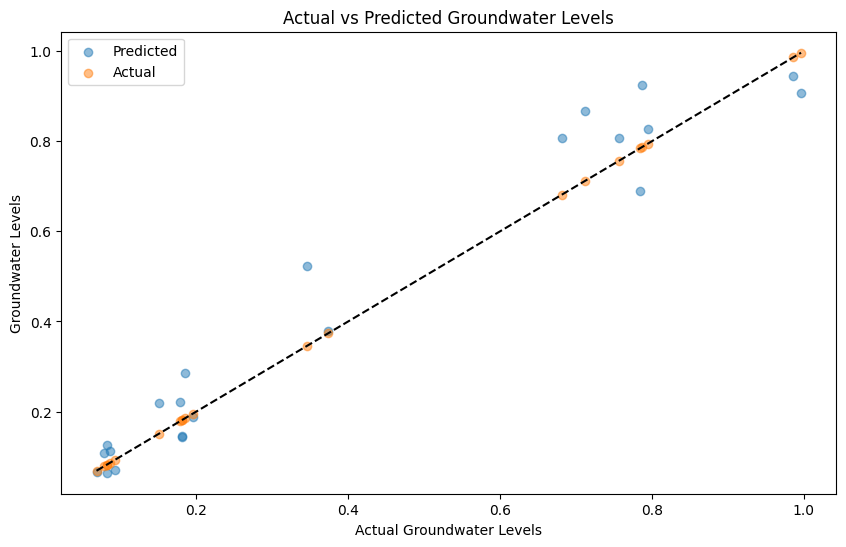

In [ ]:

# Predict the groundwater levels on the test set
y_pred = model.predict(X_test).flatten()
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plotting actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label='Predicted')
plt.scatter(y_test, y_test, alpha=0.5, label='Actual')
plt.xlabel('Actual Groundwater Levels')
plt.ylabel('Groundwater Levels')
plt.title('Actual vs Predicted Groundwater Levels')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--') # Diagonal line
plt.legend()
plt.show()

